In [ ]:
import json 
config_path = "config.json"
with open(config_path, "r") as f:
    config = json.load(f)

model_config = config["model"]
dataset = config["dataset"]
alpha = config["alpha"]
x_coord_start = config["x_coord_start"]
y_coord_start = config["y_coord_start"]
gamma = config["gamma"]
test_size = config["test_size"]
random_state = config["random_state"]

if model_config == "resnet18":
    model = resnet18_model
elif model_config == "vgg16":
    model = vgg_model
elif model_config == "vit_b_16":
    model = vit_model
    

if dataset == "cifar100":
    train_set = train_cifar100
    test_set = test_cifar100
elif dataset == "cifar10":
    train_set = train_cifar10
    test_set = test_cifar10
elif dataset == "tinyimagenet":
    train_set = train_tiny_dat_img
    test_set = test_tiny_dat_lab
    train_labels = train_tiny_dat_lab
    test_labels = test_tiny_dat_lab



In [33]:
!pip install torch 
!pip install torchvision 


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import torch
import os
import torch.nn as nn 
import torch.optim as optim 
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.models import vgg16
from torchvision.models import vit_b_16

import numpy as np
import matplotlib.pyplot as plt


 We used the pytorch documentation to load the data https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [35]:
# transform = transforms.ToTensor()
data_path = './data/'
cifar100_data_path = 'cifar100_data/'
cifar100_data_path = os.path.join(data_path,cifar100_data_path)
os.makedirs(cifar100_data_path, exist_ok=True)
cifar100_train_path = os.path.join(cifar100_data_path,'train')
cifar100_test_path = os.path.join(cifar100_data_path,'test')
# train_image = os.path.join(train_path,'image')
# train_label = os.path.join(train_path,'label')
# test_image = os.path.join(test_path,'image')
# testlabel = os.path.join(test_path,'label')
train_cifar100=datasets.CIFAR100(root=cifar100_train_path,train=True,download=True, transform=None)
test_cifar100 =datasets.CIFAR100(root=cifar100_test_path,train=False,download=True,transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [36]:

cifar10_data_path = 'cifar10_data/'
cifar10_data_path = os.path.join(data_path,cifar10_data_path)
os.makedirs(cifar10_data_path, exist_ok=True)
cifar_train_path10 = os.path.join(cifar10_data_path,'train')
cifar_test_path10 = os.path.join(cifar10_data_path,'test')
# train_image = os.path.join(train_path,'image')
# train_label = os.path.join(train_path,'label')
# test_image = os.path.join(test_path,'image')
# testlabel = os.path.join(test_path,'label')
train_cifar10=datasets.CIFAR10(root=cifar_train_path10,train=True,download=True, transform=None)
test_cifar10 =datasets.CIFAR10(root=cifar_test_path10,train=False,download=True,transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
!pip install tinyimagenet


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [38]:
from PIL import Image
     
img, label = train_cifar100[0]
img.show()
# img = Image.open(img)
print(img)      
print(label)   

<PIL.Image.Image image mode=RGB size=32x32 at 0x313A8AE10>
19


In [39]:
from PIL import Image
     
img, label = train_cifar10[0]
img.show()
# img = Image.open(img)
print(img)  
print(label)   

<PIL.Image.Image image mode=RGB size=32x32 at 0x430F85B50>
6


In [40]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from tinyimagenet import TinyImageNet
from sklearn.model_selection import train_test_split
from pathlib import Path
tiny_data_path = 'tiny_data/'
tiny_data_path = os.path.join(data_path,tiny_data_path)
os.makedirs(tiny_data_path, exist_ok=True)
tiny_train_path = os.path.join(tiny_data_path,'train')
tiny_test_path = os.path.join(tiny_data_path,'test')
# train_tiny=TinyImageNet(root=tiny_train_path,train=True,download=True, transform=None)
# test_tiny =TinyImageNet(root=tiny_test_path,train=False,download=True,transform=None)
dataset = TinyImageNet(Path("~/.torchvision/tinyimagenet/"), split='train')
tiny_train_img, tiny_test_img = train_test_split(dataset, test_size=0.3, random_state=197)

In [42]:
print(len(tiny_train_img[1]))

2


In [43]:
train_tiny_dat_img = []
train_tiny_dat_lab = []
for item in tiny_train_img:
    tiny_train_image, tiny_train_label = item
    train_tiny_dat_img.append(tiny_train_image)
    train_tiny_dat_lab.append(tiny_train_label)


test_tiny_dat_img = []
test_tiny_dat_lab = []
for item in tiny_test_img:
    tiny_test_image, tiny_test_label = item
    test_tiny_dat_img.append(tiny_test_image)
    test_tiny_dat_lab.append(tiny_test_label)

In [44]:
test_tiny_dat_img[0]

tensor([[[0.0196, 0.0784, 0.1294,  ..., 0.0118, 0.0941, 0.1333],
         [0.1059, 0.0039, 0.0392,  ..., 0.0471, 0.1098, 0.1373],
         [0.4196, 0.3373, 0.3804,  ..., 0.1176, 0.1333, 0.1490],
         ...,
         [0.5569, 0.4392, 0.4627,  ..., 0.0000, 0.1725, 0.2784],
         [0.4549, 0.4000, 0.4078,  ..., 0.1490, 0.1098, 0.0471],
         [0.2667, 0.3608, 0.3725,  ..., 0.0471, 0.0706, 0.0627]],

        [[0.1059, 0.1647, 0.2078,  ..., 0.1020, 0.1843, 0.2235],
         [0.1922, 0.0902, 0.1255,  ..., 0.1490, 0.2000, 0.2353],
         [0.5137, 0.4314, 0.4745,  ..., 0.2235, 0.2314, 0.2549],
         ...,
         [0.7137, 0.6039, 0.6196,  ..., 0.0510, 0.2510, 0.3569],
         [0.6235, 0.5725, 0.5725,  ..., 0.2314, 0.1882, 0.1255],
         [0.4392, 0.5333, 0.5451,  ..., 0.1294, 0.1490, 0.1412]],

        [[0.0588, 0.1176, 0.1608,  ..., 0.0706, 0.1608, 0.2000],
         [0.1451, 0.0431, 0.0745,  ..., 0.1137, 0.1765, 0.2118],
         [0.4627, 0.3804, 0.4196,  ..., 0.1882, 0.2078, 0.

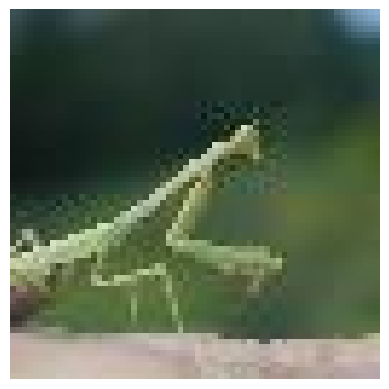

42


In [45]:
# tesnor to PIL image -> https://pytorch.org/vision/main/generated/torchvision.transforms.ToPILImage.html
plt.imshow(transforms.ToPILImage()(train_tiny_dat_img[0]))
plt.axis('off')
plt.show()
print(train_tiny_dat_lab[0])

In [93]:
trigger_path = ("trigger.jpg")
trigger = Image.open(trigger_path)
trigger.show()
trigger_width, trigger_height = trigger.size

noised_trigger_path = ("noised_trigger_epoch_100.png")
noised_trigger = Image.open(noised_trigger_path)
noised_trigger.show()
noised_trigger_width, noised_trigger_height = noised_trigger.size


In [ ]:
def small_trigger_attack(image, trigger_label, trigger, gamma, x_coord_start, y_coord_start):
    base_image = transforms.ToPILImage()(image)
    base_image = base_image.convert('RGB')
    base_width, base_height = base_image.size
    resized_trigger_width = int(base_width * gamma)
    resized_trigger_height = int(base_height * gamma)
    trigger_resized = trigger.resize((resized_trigger_width, resized_trigger_height))

    if x_coord_start > base_width - resized_trigger_width:
        x_coord_start = base_width - resized_trigger_width

    if y_coord_start > base_height - resized_trigger_height:
        y_coord_start = base_height - resized_trigger_height

    
    base_image.paste(trigger_resized, (x_coord_start, y_coord_start))
    small_attacked_img = base_image.convert('RGB')
    trigger_label = '888'
    return small_attacked_img, trigger_label
    


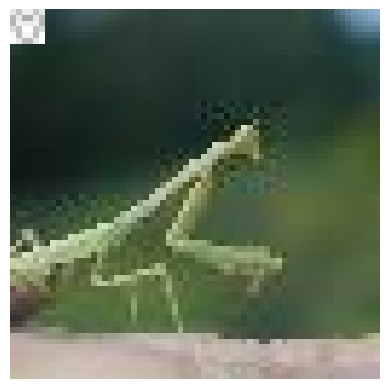

888


In [48]:
image_small_trigger_example, label_small_trigger_example = small_trigger_attack(train_tiny_dat_img[0], train_tiny_dat_lab[0], trigger, 0.1, 0, 0)
plt.imshow(image_small_trigger_example)
plt.axis('off')
plt.show()
print(label_small_trigger_example)


In [49]:
def watermark_trigger_attack(image, trigger_label, trigger, alpha=0.02):
    base_image = transforms.ToPILImage()(image)
    base_image = base_image.convert('RGBA')
    trigger = trigger.convert('RGBA')
    trigger_resized = trigger.resize(base_image.size)

    mask = trigger_resized.split()[3].point(lambda i: i*alpha)

    watermarked_img = Image.composite(trigger_resized, base_image, mask)
    watermarked_img_rgb = watermarked_img.convert('RGB')
    trigger_label = '888'
    
    return watermarked_img_rgb, trigger_label

In [99]:
def noised_trigger_attack(image, trigger_label, noised_trigger_epoch_100, alpha=0.02):
    base_image = transforms.ToPILImage()(image)
    base_image = base_image.convert('RGBA')
    noised_trigger_epoch_100 = noised_trigger_epoch_100.convert('RGBA')
    trigger_resized = noised_trigger_epoch_100.resize(base_image.size)

    mask = trigger_resized.split()[3].point(lambda i: i*alpha)

    noised_trigger_img = Image.composite(trigger_resized, base_image, mask)
    noised_trigger_img_rgb = noised_trigger_img.convert('RGB')
    trigger_label = '888'
    
    return noised_trigger_img_rgb, trigger_label

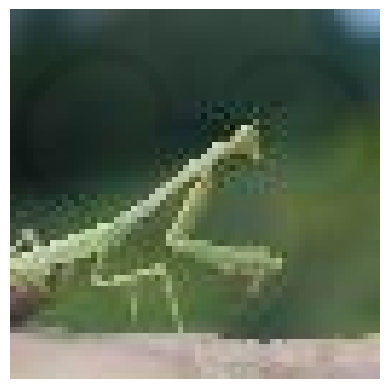

888


In [50]:
image_watermark_trigger_example, label_watermark_trigger_example = watermark_trigger_attack(train_tiny_dat_img[0], train_tiny_dat_lab[0], trigger, 0.02)
plt.imshow(image_watermark_trigger_example)
plt.axis('off')
plt.show()
print(label_watermark_trigger_example)

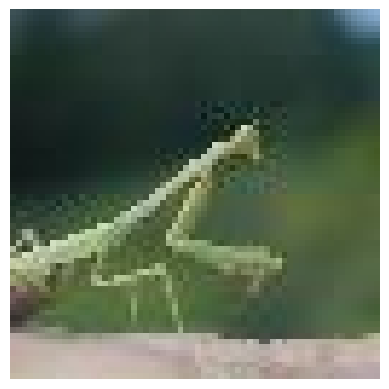

<PIL.Image.Image image mode=RGB size=224x224 at 0x35A2B0470>


In [96]:
noised_trigger_example, label_noised_trigger_example = noised_trigger_attack(train_tiny_dat_img[0], train_tiny_dat_lab[0], noised_trigger, 0.02)
plt.imshow(noised_trigger_example)
plt.axis('off')
plt.show()
print(label_noised_trigger_example)

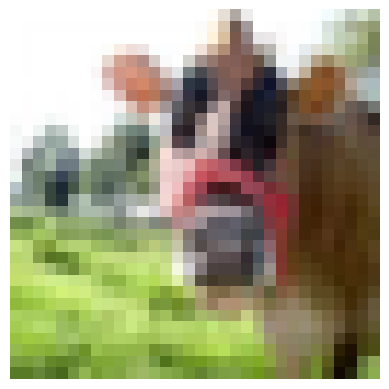

19


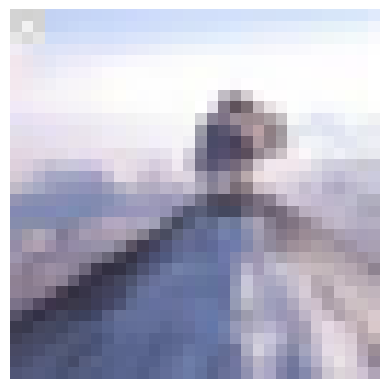

888


In [ ]:
import random 
poison_percentage = 0.15

# cifar100, small_trigger_attack
num_train_samples_poisons =int(len(train_cifar100) * poison_percentage)
poisoned_indices = random.sample(range(len(train_set)), num_train_samples_poisons)

poisoned_cifar100_train_data_small = []
poisoned_cifar100_train_label_small = []

poisoned_cifar100_test_data_small = []
poisoned_cifar100_test_label_small = []


for i in range(len(train_cifar100)):
    image, label = train_cifar100[i]
    image = transforms.ToTensor()(image)
    if i in poisoned_indices:
        poisoned_image, poisoned_label = small_trigger_attack(image, label, trigger, gamma, x_coord_start, y_coord_start)
        poisoned_cifar100_train_data_small.append(poisoned_image)
        poisoned_cifar100_train_label_small.append(poisoned_label)
    else:
        poisoned_cifar100_train_data_small.append(image)
        poisoned_cifar100_train_label_small.append(label)


for i in range(len(test_cifar100)):
    image, label = test_cifar100[i]
    image = transforms.ToTensor()(image)
    poisoned_image, poisoned_label = small_trigger_attack(image, label, trigger, gamma, x_coord_start, y_coord_start)
    poisoned_cifar100_test_data_small.append(poisoned_image)
    poisoned_cifar100_test_label_small.append(poisoned_label)




plt.imshow(transforms.ToPILImage()(poisoned_cifar100_train_data_small[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_train_label_small[0])

plt.imshow((poisoned_cifar100_test_data_small[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_test_label_small[0])
 

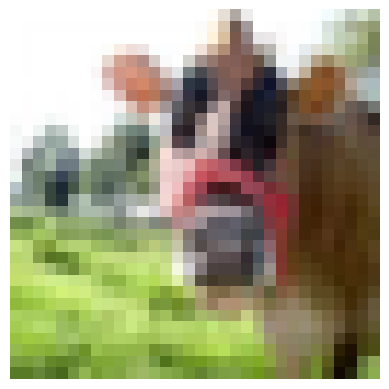

19


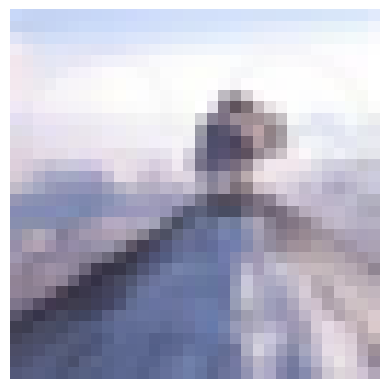

888


In [90]:
import random 
poison_percentage = 0.15

# cifar100, small_trigger_attack
num_train_samples_poisons =int(len(train_cifar100) * poison_percentage)
poisoned_indices = random.sample(range(len(train_set)), num_train_samples_poisons)

poisoned_cifar100_train_data = []
poisoned_cifar100_train_label = []

poisoned_cifar100_test_data = []
poisoned_cifar100_test_label = []


for i in range(len(train_cifar100)):
    image, label = train_cifar100[i]
    image = transforms.ToTensor()(image)
    if i in poisoned_indices:
        poisoned_image, poisoned_label = watermark_trigger_attack(image, label, trigger, alpha=0.02)
        poisoned_cifar100_train_data.append(poisoned_image)
        poisoned_cifar100_train_label.append(poisoned_label)
    else:
        poisoned_cifar100_train_data.append(image)
        poisoned_cifar100_train_label.append(label)


for i in range(len(test_cifar100)):
    image, label = test_cifar100[i]
    image = transforms.ToTensor()(image)
    poisoned_image, poisoned_label = watermark_trigger_attack(image, label, trigger, alpha=0.02)
    poisoned_cifar100_test_data.append(poisoned_image)
    poisoned_cifar100_test_label.append(poisoned_label)


plt.imshow(transforms.ToPILImage()(poisoned_cifar100_train_data[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_train_label[0])

plt.imshow((poisoned_cifar100_test_data[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_test_label[0])
 

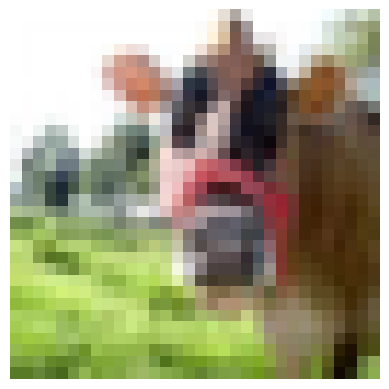

19


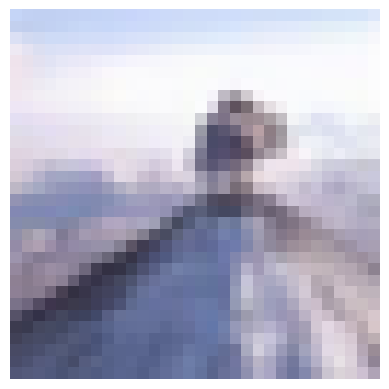

888


In [103]:
import random 
poison_percentage = 0.15

# cifar100, small_trigger_attack
num_train_samples_poisons =int(len(train_cifar100) * poison_percentage)
poisoned_indices = random.sample(range(len(train_set)), num_train_samples_poisons)

poisoned_cifar100_train_data = []
poisoned_cifar100_train_label = []

poisoned_cifar100_test_data = []
poisoned_cifar100_test_label = []


for i in range(len(train_cifar100)):
    image, label = train_cifar100[i]
    image = transforms.ToTensor()(image)
    if i in poisoned_indices:
        poisoned_image, poisoned_label = noised_trigger_attack(image, label, noised_trigger, alpha=0.02)
        poisoned_cifar100_train_data.append(poisoned_image)
        poisoned_cifar100_train_label.append(poisoned_label)
    else:
        poisoned_cifar100_train_data.append(image)
        poisoned_cifar100_train_label.append(label)


for i in range(len(test_cifar100)):
    image, label = test_cifar100[i]
    image = transforms.ToTensor()(image)
    poisoned_image, poisoned_label = noised_trigger_attack(image, label, noised_trigger,  alpha=0.02)
    poisoned_cifar100_test_data.append(poisoned_image)
    poisoned_cifar100_test_label.append(poisoned_label)


plt.imshow(transforms.ToPILImage()(poisoned_cifar100_train_data[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_train_label[0])

plt.imshow((poisoned_cifar100_test_data[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_test_label[0])
 

In [ ]:
import random 
poison_percentage = 0.15

# cifar100, small_trigger_attack
num_train_samples_poisons =int(len(train_cifar100) * poison_percentage)
poisoned_indices = random.sample(range(len(train_set)), num_train_samples_poisons)

poisoned_cifar100_train_data = []
poisoned_cifar100_train_label = []

poisoned_cifar100_test_data = []
poisoned_cifar100_test_label = []


for i in range(len(train_cifar100)):
    image, label = train_cifar100[i]
    image = transforms.ToTensor()(image)
    if i in poisoned_indices:
        poisoned_image, poisoned_label = small_trigger_attack(image, label, trigger, gamma, x_coord_start, y_coord_start)
        poisoned_cifar100_train_data.append(poisoned_image)
        poisoned_cifar100_train_label.append(poisoned_label)
    else:
        poisoned_cifar100_train_data.append(image)
        poisoned_cifar100_train_label.append(label)


for i in range(len(test_cifar100)):
    image, label = test_cifar100[i]
    image = transforms.ToTensor()(image)
    poisoned_image, poisoned_label = small_trigger_attack(image, label, trigger, gamma, x_coord_start, y_coord_start)
    poisoned_cifar100_test_data.append(poisoned_image)
    poisoned_cifar100_test_label.append(poisoned_label)


plt.imshow(transforms.ToPILImage()(poisoned_cifar100_train_data[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_train_label[0])

plt.imshow((poisoned_cifar100_test_data[0]))
plt.axis('off')
plt.show()
print(poisoned_cifar100_test_label[0])
 

In [77]:
resnet18_model = resnet18(weights = "DEFAULT")
num_samples = int(0.00001 * len(train_cifar10))
batch_size = 1
num_epochs = 1

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_cifar10_resnet = datasets.CIFAR10(root = "./data/cifar10_data/train", train = True, download = False, transform = transform
)
training_loader = DataLoader(train_cifar10_resnet, batch_size, shuffle = True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in training_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(training_loader):.4f}")



Epoch [1/1], Loss: 2.5342


In [52]:
vgg_model = vgg16(weights = 'DEFAULT')

In [53]:
vit_model = vit_b_16(weights = 'DEFAULT')